# Numerical solution of ODEs - BVP

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Finite differnce method for solving BVP problems

Example BVP:
\begin{equation}
  \frac{d^2y}{dx^2}=\frac{dy}{dx} + y
\end{equation}
with boundary conditions
\begin{equation}
   y(0) = 0 \textrm{ and } y(1) =1
\end{equation}

This example BVP is a steady advection-diffusion-reaction equation. Here $\frac{d^2y}{dx^2}$ is the diffusion term (due to molecular or turbulent diffusion), $\frac{dy}{dx}$ is the advection term (carried around by flowing fluid), and $y$ is the sink/source term (due to reaction).

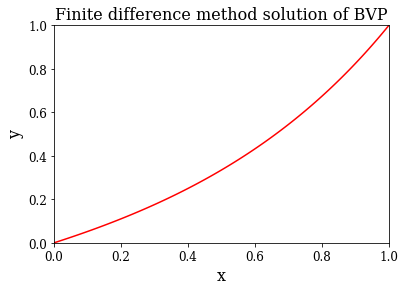

In [20]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#boundary coordinates
a = 0.0
b = 1.0 

#number of grid points (n+1)
n = 100

#step (grid) size
h = (b-a)/n
x = np.linspace(a, b, n+1)

#set up the matrix
A = np.zeros((n+1,n+1))

#set up the right hand size vector
b = np.zeros(n+1)

#for left boundary (i=0)
A[0,0] = 1.0
b[0] = 0.0

#for internal grid points (i=1,n-1)
#loop over each row of matrix A
for i in range(1,n):
    A[i,i-1] = 1.0
    A[i,i] = h-2-h**2
    A[i,i+1] = 1.0-h

#for right boundary (i=n)
A[n,n] = 1.0
b[n] = 1.0    

y = np.linalg.solve(A, b)

plt.plot(x, y, 'r')

#set the limit for the x and y axes
plt.xlim([0,1])
plt.ylim([0,1])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Finite difference method solution of BVP',fontsize=16)

#show legend, set its location, font size, and turn off the frame
#plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show()

## Example BVP with different boundary condition

Example BVP:
\begin{equation}
  \frac{d^2y}{dx^2}=\frac{dy}{dx} + y
\end{equation}
with boundary conditions
\begin{equation}
   y(0) = 1 \textrm{ and } \frac{dy}{dx}|_{x=1} = 0
\end{equation}

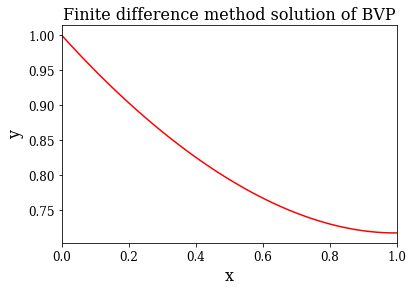

In [19]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#boundary coordinates
a = 0.0
b = 1.0 

#number of grid points (n+1)
n = 100

#step (grid) size
h = (b-a)/n
x = np.linspace(a, b, n+1)

#set up the matrix
A = np.zeros((n+1,n+1))

#set up the right hand size vector
b = np.zeros(n+1)

#for left boundary (i=0)
A[0,0] = 1.0
b[0] = 1.0

#for internal grid points (i=1,n-1)
#loop over each row of matrix A
for i in range(1,n):
    A[i,i-1] = 1.0
    A[i,i] = h-2-h**2
    A[i,i+1] = 1.0-h

#for right boundary (i=n)
A[n,n-1] = 1.0
A[n,n] = -1.0
b[n] = 0.0    

y = np.linalg.solve(A, b)

plt.plot(x, y, 'r')

#set the limit for the x and y axes
plt.xlim([0,1])
#plt.ylim([0,1])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Finite difference method solution of BVP',fontsize=16)

#show legend, set its location, font size, and turn off the frame
#plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show()